# Create Sketch for Paper

## packages

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.special import gammaincinv, digamma
import warnings
warnings.filterwarnings('ignore')

# my lib
from importlib import reload
import cmip6_lib

In [2]:
# if you changed something in cmip6_lib.py
reload(cmip6_lib)

<module 'cmip6_lib' from '/export/data1/hgpeterson/ResearchSchneider/cmip_analysis/cmip6_lib.py'>

In [3]:
"""
    precip = get_precip(pctls, k, θ)
    
Get ammount of precipitation at given percentile for Gamma distribution defined by k and θ.
"""
def get_precip(pctls, k, θ):
    return θ*gammaincinv(k, pctls)

## Perterbation Coefficients

0.1111111111111111 18.0


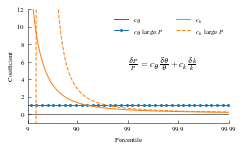

In [4]:
# pctls to use
pctl_min = 0.09
pctl_max = 0.9999
N = 1000
pctls = cmip6_lib.inv_x_transform(np.linspace(cmip6_lib.x_transform(pctl_min), cmip6_lib.x_transform(pctl_max), N))

# basic state
μ = 2
σ = 6
k, θ = cmip6_lib.gamma_moments(μ, σ)
print(k, θ)
P = get_precip(pctls, k, θ)

# coefficients
ck_large_P = k*θ/P*(np.log(P/θ) - digamma(k))
ck_small_P = digamma(k) + np.log(θ/P) + 1/k
cθ_large_P = np.ones(P.shape)
cθ_small_P = np.ones(P.shape)

# exact change 
# cθ = (δP/P)/(δθ/θ)
δθ = 0.01*θ
P_prime = get_precip(pctls, k, θ + δθ)
cθ_exact = ((P_prime - P)/P)/(δθ/θ)
# ck = (δP/P)/(δk/k)
δk = 0.01*k
P_prime = get_precip(pctls, k + δk, θ)
ck_exact = ((P_prime - P)/P)/(δk/k)

# plot
fig, ax = plt.subplots(1)
cmip6_lib.fix_xticks(ax)

nskip = int(N/35)
ms = 2
ax.plot(cmip6_lib.x_transform(pctls), cθ_exact, c="tab:blue", ls="-", label="$c_\\theta$")
ax.plot(cmip6_lib.x_transform(pctls), cθ_large_P, c="tab:blue", ls="-", label="$c_\\theta$ large $P$")
ax.plot(cmip6_lib.x_transform(pctls)[int(nskip/2)::nskip], cθ_large_P[int(nskip/2)::nskip], c="tab:blue", ls="", marker="o", ms=ms, label="$c_\\theta$ large $P$")
ax.plot(cmip6_lib.x_transform(pctls), ck_exact,   c="tab:orange", ls="-", label="$c_k$")
ax.plot(cmip6_lib.x_transform(pctls), ck_large_P, c="tab:orange", ls="--", label="$c_k$ large $P$")
ax.annotate("$\\frac{\\delta P}{P} = c_\\theta\\frac{\\delta\\theta}{\\theta} + c_k\\frac{\\delta k}{k}$", [0.5, 0.5], xycoords="axes fraction", size=9)
ax.axhline(0, ls="-", c="k", lw=0.5)

custom_handles = [Line2D([0], [0], ls="-", c="tab:blue"),
                 Line2D([0], [0],  marker="o", ms=ms, ls="-", c="tab:blue"),
                 Line2D([0], [0],  ls="-", c="tab:orange"),
                 Line2D([0], [0],  ls="--", c="tab:orange")]
custom_labels = ["$c_\\theta$", "$c_\\theta$ large $P$", "$c_k$", "$c_k$ large $P$"]
ax.legend(custom_handles, custom_labels, loc="upper right", ncol=2)
ax.set_xlabel("Percentile")
ax.set_ylabel("Coefficient")
ax.set_ylim([-1, 12])
plt.tight_layout()
plt.savefig("theory.png")
plt.savefig("theory.pdf")

In [5]:
# percentile where P > θ
100*pctls[np.where(P > θ)][0]

97.31266570080676

## Sketch Plot

In [6]:
# pctls to use
pctl_min = 0.09
pctl_max = 0.9999
pctls = cmip6_lib.inv_x_transform(np.linspace(cmip6_lib.x_transform(pctl_min), cmip6_lib.x_transform(pctl_max), 100))

# basic state
μ_c = 2
σ_c = 6
k_c, θ_c = cmip6_lib.gamma_moments(μ_c, σ_c)
precip_c = get_precip(pctls, k_c, θ_c)

# pretend warming
ΔT = 5

# shift mean only
mean_scaling = 0.02*ΔT
extreme_scaling = 0.0*ΔT
θ_mean = θ_c*(1 + extreme_scaling)
k_mean = k_c*(1 + mean_scaling - extreme_scaling)
precip_mean = get_precip(pctls, k_mean, θ_mean)
ratio_mean = 100*(precip_mean/precip_c - 1)

# shift extremes only
mean_scaling = 0.0*ΔT
extreme_scaling = 0.07*ΔT
θ_extreme = θ_c*(1 + extreme_scaling)
k_extreme = k_c*(1 + mean_scaling - extreme_scaling)
precip_extreme = get_precip(pctls, k_extreme, θ_extreme)
ratio_extreme = 100*(precip_extreme/precip_c - 1)

# shift both
mean_scaling = 0.02*ΔT
extreme_scaling = 0.07*ΔT
θ_both = θ_c*(1 + extreme_scaling)
k_both = k_c*(1 + mean_scaling - extreme_scaling)
precip_both = get_precip(pctls, k_both, θ_both)
ratio_both = 100*(precip_both/precip_c - 1)

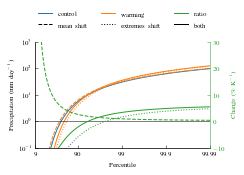

In [7]:
# setup plot
fig, ax = plt.subplots(1, figsize=(3.404, 3.404/1.62+0.4))
axtwin = cmip6_lib.setup_pctl_plot(ax)

# plot
ax.plot(cmip6_lib.x_transform(pctls), cmip6_lib.y_transform(precip_c), c="tab:blue", label="control")
ax.plot(cmip6_lib.x_transform(pctls), cmip6_lib.y_transform(precip_mean), c="tab:orange", ls="--", label="mean shift")
ax.plot(cmip6_lib.x_transform(pctls), cmip6_lib.y_transform(precip_extreme), c="tab:orange", ls=":", label="extremes shift")
ax.plot(cmip6_lib.x_transform(pctls), cmip6_lib.y_transform(precip_both), c="tab:orange", ls="-", label="both")

# ratios
axtwin.plot(cmip6_lib.x_transform(pctls), ratio_mean/ΔT, c="tab:green", ls="--")
axtwin.plot(cmip6_lib.x_transform(pctls), ratio_extreme/ΔT, c="tab:green", ls=":")
axtwin.plot(cmip6_lib.x_transform(pctls), ratio_both/ΔT, c="tab:green", ls="-")

custom_lines = [Line2D([0], [0], ls="-", c="tab:blue"),
               Line2D([0], [0], ls="--", c="k"),
               Line2D([0], [0], ls="-", c="tab:orange"),
               Line2D([0], [0], ls=":", c="k"),                
               Line2D([0], [0], ls="-", c="tab:green"),
               Line2D([0], [0], ls="-", c="k")
               ]
custom_handles = ["control", "mean shift", "warming", "extremes shift", "ratio", "both"]
ax.legend(custom_lines, custom_handles, loc=(0, 1.1), ncol=3)
ax.set_xlabel("Percentile")
ax.set_ylabel("Precipitation (mm day$^{-1}$)")    
axtwin.set_ylabel("Change (\% K$^{-1}$)", c="tab:green")

plt.tight_layout()
fig.savefig("sketch.png")
fig.savefig("sketch.pdf")